# Introduction
**CSXXX - Causal Inference**

*Elias Bareinboim*

In [ ]:
# @title Download library
%%capture
!wget https://jdcorrea.me/causality.py


In [ ]:
import causality

# Structural Causal Models

A structural causal model $\mathcal{M}$ is a 4-tuple $\langle \mathbf{U}, \mathbf{V}, \mathcal{F}, P(\mathbf{U})\rangle$, where
- $\mathbf{U}$ is a set of background variables, also called exogenous variables, that are determined by factors outside the model;
- $\mathbf{V}$ is a set $\{V_1, V_2, \ldots, V_n\}$ of variables, called endogenous, that are determined by other variables in the model --- that is, variables in $\mathbf{U} \cup \mathbf{V}$;
-  $\mathcal{F}$ is a set of functions $\{ f_1, f_2, \ldots, f_n\}$ such that each $f_i$ is a mapping from (the respective domains of) $U_{i} \cup \text{Pa}_{i}$ to $V_{i}$, where $U_{i} \subseteq \mathbf{U}$, $\text{Pa}_{i} \subseteq \mathbf{V} \setminus V_{i}$, and the entire set $\mathcal{F}$ forms a mapping from $\mathbf{U}$ to $\mathbf{V}$. That is, for $i=1,\ldots,n$, each $f_i \in \mathcal{F}$ is such that
    
    $$v_i \leftarrow f_i(\text{pa}_{i}, u_i),$$

    i.e., it assigns a value to $V_i$ that depends on (the values of) a select set of variables in $\mathbf{U} \cup \mathbf{V}$; and
- $P(\mathbf{U})$ is a probability function defined over the domain of $\mathbf{U}$.


## Example 2.1
Consider a game of chance described through the SCM $\mathcal{M}^1 = \langle \mathbf{U} = \{U_1, U_2\}$, $\mathbf{V} = \{X, Y\}, \mathcal{F}, P(U_1, U_2) \rangle$, where
$$
    \mathcal{F} = \begin{cases}
        X &\gets U_1 + U_2\\
        Y &\gets U_1 - U_2
    \end{cases},
$$

and $P(U_i=k)=1/6$, $i=1,2$, $k=1,\ldots,6$.
In other words, this structural model represents the setting where two dice are rolled, but only the sum ($X$) and the difference ($Y$) of their values are observed. Here, the domains of $X$ and $Y$ are, respectively, $Val(X)=\{2, \ldots, 12\}$ and $Val(Y)=\{-5,\ldots, 0, \ldots, 5\}$.

In [ ]:
# Simulation for model M1

# define PU as a dictionary where the keys are the names of the variables
# in U and the values are also dictionaries with values as keys and probabilities as values.
Pu = {
    "U1": {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6},
    "U2": {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6},
}

# define the set of functions as a dictionary where the keys are the names of the
# observables and the values are the corresponding functions.
F = {
    "X": lambda U1, U2: U1 + U2,
    "Y": lambda U1, U2: U1 - U2
}
# Here we used lambda notation to define the function for the observables,
# but we could first define the function and then add it to F. Like this:
#
# def fX(U1, U2):
#     return U1 + U2
#
# def fY(U1, U2):
#     return U1 - U2

# F = {
#     "X": fX
#     "Y": fY
# }
#
# While both syntax are valid, lambda gives nive looking definitions when the function is
# really simple and can be written in one line.

# Create the model with F and Pu (and the implicit V and U)
M1 = causality.SCM(F, Pu)

Let the dice (exogenous variables) be $\langle U_1 = 1, U_2 = 1 \rangle$, then $\mathbf{V}=\{X,Y\}$ attain their values  through $\mathcal{F}$ as $X = 1 + 1 = 2$ and $Y = 1 - 1 = 0$. Since $P(U_1 = 1, U_2 = 1) = 1/36$ and $\langle U_1 = 1, U_2 = 1 \rangle$ is the only configuration capable of producing the observed behavior $\langle X = 2, Y = 0 \rangle$, it follows that $P(X = 2, Y = 0) = 1/36$.

In [ ]:
print(M1.compute_values({"U1": 1, "U2": 1}))

{'U1': 1, 'U2': 1, 'X': 2, 'Y': 0}


More interestingly, consider the different dice (exogenous) configurations $\langle U_1, U_2 \rangle = \{ \langle 1,1\rangle ,$ $\langle 2,2 \rangle , \langle 3,3 \rangle, \langle 4,4 \rangle, \langle 5,5 \rangle, \langle 6,6 \rangle \}$, which are all compatible with the event $\langle Y = 0 \rangle$. Since each of

In [ ]:
for i in [1,2,3,4,5,6]:
    print(M1.compute_values({"U1": i, "U2": i}))

{'U1': 1, 'U2': 1, 'X': 2, 'Y': 0}
{'U1': 2, 'U2': 2, 'X': 4, 'Y': 0}
{'U1': 3, 'U2': 3, 'X': 6, 'Y': 0}
{'U1': 4, 'U2': 4, 'X': 8, 'Y': 0}
{'U1': 5, 'U2': 5, 'X': 10, 'Y': 0}
{'U1': 6, 'U2': 6, 'X': 12, 'Y': 0}


We note that each unit $\mathbf{u}$ induce certain values for $X$ and $Y$ via the functions $\mathbf{F}$.
When the units show up according to the distribution $P(\mathbf{U})$, we get a join distribution over the results we just saw:

In [ ]:
M1.get_distribution(marg_u=False)

,U1,U2,X,Y,Prob
0,1,1,2,0,0.027778
1,1,2,3,-1,0.027778
2,1,3,4,-2,0.027778
3,1,4,5,-3,0.027778
4,1,5,6,-4,0.027778
5,1,6,7,-5,0.027778
6,2,1,3,1,0.027778
7,2,2,4,0,0.027778
8,2,3,5,-1,0.027778
9,2,4,6,-2,0.027778


By design, the distribution over $\mathbf{U}$ is uniform, hence each unit gets the same probability.

In practice, we only get to see the values of $X$ and $Y$, therefore what we can compute from data is $P(X, Y)$:

     X  Y      Prob
0    2  0  0.027778
1    3 -1  0.027778
2    3  1  0.027778
3    4 -2  0.027778
4    4  0  0.027778
5    4  2  0.027778
6    5 -3  0.027778
7    5 -1  0.027778
8    5  1  0.027778
9    5  3  0.027778
10   6 -4  0.027778
11   6 -2  0.027778
12   6  0  0.027778
13   6  2  0.027778
14   6  4  0.027778
15   7 -5  0.027778
16   7 -3  0.027778
17   7 -1  0.027778
18   7  1  0.027778
19   7  3  0.027778
20   7  5  0.027778
21   8 -4  0.027778
22   8 -2  0.027778
23   8  0  0.027778
24   8  2  0.027778
25   8  4  0.027778
26   9 -3  0.027778
27   9 -1  0.027778
28   9  1  0.027778
29   9  3  0.027778
30  10 -2  0.027778
31  10  0  0.027778
32  10  2  0.027778
33  11 -1  0.027778
34  11  1  0.027778
35  12  0  0.027778


array([[<Axes: title={'center': 'Y'}>]], dtype=object)

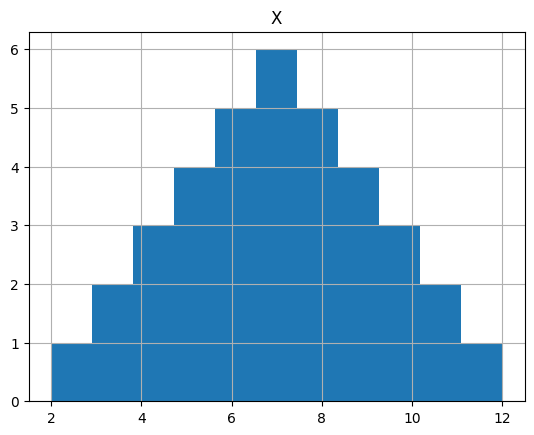

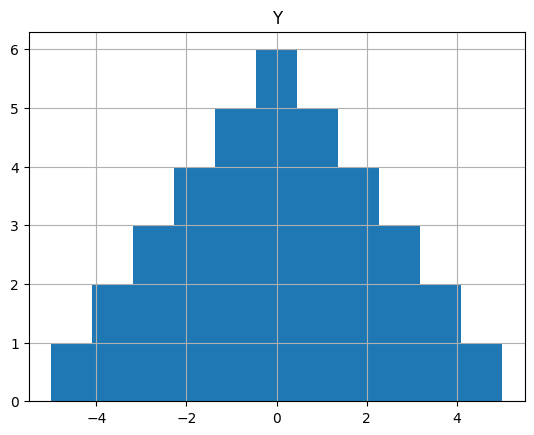

In [ ]:
Pv = M1.get_distribution()
print(Pv)
Pv.hist("X", bins=11)
Pv.hist("Y", bins=11)

We can see that both $X$ and $Y$ behave like a normal random variable.

Finally, what is the probability of the difference between the two dice being zero $(Y=0)$ if we know that their sum is two,
i.e., $P(Y=0 \mid X =2)$?

In [ ]:
P = M1.get_distribution(["Y"], ["X"]) # gets a Pandas dataframe with the distribution
print(P.query("Y==0 and X==2")) # filters the row of the dataframe consistent with the event of interest

    Y  X  Prob
15  0  2   1.0


## Example 2.2

Consider the SCM $\mathcal{M}^2 = \langle \mathbf{V} = \{X, Y, Z \}, \mathbf{U} = \{U_r, U_x, U_y, U_z\},$ $\mathcal{F} = \{ f_x, f_y, f_z \},$ $P(U_r, U_x, $ $U_y, U_z) \rangle$, where the endogenous variables $\mathbf{V}$ represent, respectively, a certain treatment $X$ (e.g., drug), an outcome $Y$ (survival), and the presence or not of a symptom $Z$ (hypertension).
 The exogenous variable $U_r$ represents whether the person has a certain natural resistance to the disease, and $U_x, U_y, U_z$ are sources of variations outside the model affecting $X, Y, Z$, respectively.

In this population, units with resistance ($U_r=1$) are likely to survive ($Y=1$) regardless of the treatment received. Whenever the symptom is present ($Z=1$),  physicians try to counter it by prescribing this drug ($X=1$).
  While the treatment ($X=1$) helps resistant patients (with $U_r = 1$), it worsens the situation for those who are not resistant ($U_r = 0$).
In particular, the causal mechanisms $\mathcal{F} $ are specified as follows:
\begin{align}
    \mathcal{F} = \begin{cases}
        Z &\gets \mathbf{1} \left( U_r=1, U_z=1 \right) \\
        X &\gets \mathbf{1} \left( Z=1, U_x=1 \right) + \mathbf{1} \left(Z=0, U_x=0 \right)\\
        Y &\gets \mathbf{1} \left(X=1, U_r=1 \right) + \mathbf{1} \left( X=0, U_r=1, U_y = 1 \right) + \mathbf{1} \left( X=0, U_r=0, U_y = 0 \right)
    \end{cases}.
\end{align}
Finally, all the exogenous variables are binary with $P(U_r=1)=0.25$, $P(U_z=1)=0.95$, $P(U_x=1)=0.9$, and $P(U_y=1)=0.7$.

Let us define the SCM for the simulation next:

In [ ]:
F = {
    "Z": lambda Ur, Uz: 1 if Ur==1 and Uz==1 else 0,
    "X": lambda Ux, Z: (1 if Z==1 and Ux==1 else 0) + (1 if Z==0 and Ux==0 else 0),
    "Y": lambda Ur, Uy, X: (1 if X==1 and Ur==1 else 0) + (1 if X==0 and Ur==1 and Uy==1 else 0) + (1 if X==0 and Ur==0 and Uy==0 else 0)
}

Pu = {
    "Ur": {1: 0.25, 0: 0.75},
    "Uz": {1: 0.95, 0: 0.75},
    "Ux": {1: 0.90, 0: 0.75},
    "Uy": {1: 0.70, 0: 0.75},
}

M2 = causality.SCM(F, Pu)

In [ ]:
M2.get_distribution()

,Z,X,Y,Prob
0,0,0,0,0.929812
1,0,0,1,0.978750
2,0,1,0,1.386562
3,0,1,1,0.203906
4,1,0,0,0.133594
5,1,0,1,0.124687
6,1,1,1,0.309937
